# Platto Pizza - EDA

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Reading data from csv files

In [2]:
orders = pd.read_csv('D:\personal project\PizzaSales\orders.csv')

In [3]:
orders

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [4]:
order_details = pd.read_csv('D:\personal project\PizzaSales\order_details.csv')

In [5]:
order_details

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [6]:
pizza = pd.read_csv('D:\personal project\PizzaSales\pizzas.csv')

In [7]:
pizza

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [8]:
pizza_types = pd.read_csv('D:\personal project\PizzaSales\pizza_types.csv', encoding = 'windows-1252')

In [9]:
pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


Getting columns list

In [10]:
orders.columns

Index(['order_id', 'date', 'time'], dtype='object')

In [11]:
order_details.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

In [12]:
pizza.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

In [13]:
pizza_types.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

# Looking for basic information from data

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [15]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [17]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


# Getting data described

In [18]:
orders.describe()

,order_id
count,21350.000000
mean,10675.500000
std,6163.358459
min,1.000000
25%,5338.250000
50%,10675.500000
75%,16012.750000
max,21350.000000


In [19]:
order_details.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [20]:
pizza.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [21]:
pizza_types.describe()

,pizza_type_id,name,category,ingredients
count,32,32,32,32
unique,32,32,4,32
top,bbq_ckn,The Barbecue Chicken Pizza,Supreme,"Barbecued Chicken, Red Peppers, Green Peppers,..."
freq,1,1,9,1


# Checking for null entries if any

In [22]:
orders.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

In [23]:
order_details.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [24]:
pizza_types.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [25]:
pizza.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

# Performing merge operation on 2 dataframes from better understanding.

In [26]:
pizza_df = pd.merge(pizza,pizza_types, on = 'pizza_type_id',how = 'left')

# Now this dataframe habe all information related to pizza

In [27]:
pizza_df

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


# This DataFrame have all info related to orders.

In [28]:
order_df = pd.merge(orders, order_details,on = 'order_id',how = 'left')

In [29]:
order_df

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1
...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1


# Again performed merge operation to get final data set.

In [30]:
final_df = pd.merge(pizza_df, order_df, on = 'pizza_id', how = 'left')

In [31]:
final_df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48620,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21230.0,2015-12-29,14:43:26,48341.0,1.0
48621,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21278.0,2015-12-31,11:22:31,48452.0,1.0
48622,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21305.0,2015-12-31,16:31:16,48523.0,1.0
48623,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21317.0,2015-12-31,18:01:42,48548.0,1.0


# Now checking for basic info from final data

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48625 entries, 0 to 48624
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pizza_id          48625 non-null  object 
 1   pizza_type_id     48625 non-null  object 
 2   size              48625 non-null  object 
 3   price             48625 non-null  float64
 4   name              48625 non-null  object 
 5   category          48625 non-null  object 
 6   ingredients       48625 non-null  object 
 7   order_id          48620 non-null  float64
 8   date              48620 non-null  object 
 9   time              48620 non-null  object 
 10  order_details_id  48620 non-null  float64
 11  quantity          48620 non-null  float64
dtypes: float64(4), object(8)
memory usage: 4.8+ MB


# Column List in final dataframe.

In [33]:
final_df.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price', 'name', 'category',
       'ingredients', 'order_id', 'date', 'time', 'order_details_id',
       'quantity'],
      dtype='object')

# Describing final dataframe

In [34]:
final_df.describe()

,price,order_id,order_details_id,quantity
count,48625.000000,48620.000000,48620.000000,48620.000000
mean,16.494004,10701.479761,24310.500000,1.019622
std,3.621761,6180.119770,14035.529381,0.143077
min,9.750000,1.000000,1.000000,1.000000
25%,12.750000,5337.000000,12155.750000,1.000000
50%,16.500000,10682.500000,24310.500000,1.000000
75%,20.250000,16100.000000,36465.250000,1.000000
max,35.950000,21350.000000,48620.000000,4.000000


# Checking for null entries in final dataframe

In [35]:
final_df.isna().sum()

pizza_id            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
order_id            5
date                5
time                5
order_details_id    5
quantity            5
dtype: int64

# Fetching first 25 rows of data for better understanding.

In [36]:
final_df.tail(25)

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity
48600,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20263.0,2015-12-10,20:45:19,46140.0,1.0
48601,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20426.0,2015-12-13,17:24:28,46513.0,1.0
48602,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20440.0,2015-12-13,18:58:46,46545.0,1.0
48603,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20460.0,2015-12-14,12:16:25,46586.0,1.0
48604,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20488.0,2015-12-14,17:57:55,46661.0,1.0
48605,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20504.0,2015-12-14,20:36:46,46689.0,1.0
48606,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20524.0,2015-12-15,13:21:22,46748.0,1.0
48607,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20617.0,2015-12-16,18:46:00,46940.0,1.0
48608,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20626.0,2015-12-16,19:48:12,46955.0,1.0
48609,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",20628.0,2015-12-16,20:12:40,46959.0,1.0


# Used For Loop to extract columns with null entries.

In [38]:
for i in final_df.columns:
    if final_df[i].isnull().sum()>0:
        print(i)
    

order_id
date
time
order_details_id
quantity


# Used List Comprehension to extract columns with null entries.

In [39]:
[features for features in final_df.columns if final_df[features].isnull().sum()>0]

['order_id', 'date', 'time', 'order_details_id', 'quantity']

# Extracting rows with null entries.

In [40]:
nullentries = (final_df.loc[pd.isnull(final_df).any(1),:])

In [41]:
 final_df.loc[final_df.isnull().any(axis=1), final_df.isnull().any()]

,order_id,date,time,order_details_id,quantity
12626,NaN,NaN,NaN,NaN,NaN
12627,NaN,NaN,NaN,NaN,NaN
37173,NaN,NaN,NaN,NaN,NaN
37174,NaN,NaN,NaN,NaN,NaN
38534,NaN,NaN,NaN,NaN,NaN


In [42]:
pd.DataFrame(nullentries)

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity
12626,big_meat_m,big_meat,M,16.00,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",NaN,NaN,NaN,NaN,NaN
12627,big_meat_l,big_meat,L,20.50,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",NaN,NaN,NaN,NaN,NaN
37173,five_cheese_s,five_cheese,S,12.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",NaN,NaN,NaN,NaN,NaN
37174,five_cheese_m,five_cheese,M,15.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",NaN,NaN,NaN,NaN,NaN
38534,four_cheese_s,four_cheese,S,11.75,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",NaN,NaN,NaN,NaN,NaN


# Dropping the null entries in the dataframe as their count is negligible as compared to count of total entries

Null entries - 5
Total entries - 48625
Total Entries after removing null entries - 48620

In [43]:
final_df.dropna(inplace = True)

In [44]:
final_df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48620,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21230.0,2015-12-29,14:43:26,48341.0,1.0
48621,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21278.0,2015-12-31,11:22:31,48452.0,1.0
48622,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21305.0,2015-12-31,16:31:16,48523.0,1.0
48623,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21317.0,2015-12-31,18:01:42,48548.0,1.0


# Created new column

In [45]:
final_df['ordervalue'] = final_df['price'] * final_df['quantity']

In [46]:
final_df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,ordervalue
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,12.75
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,12.75
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,12.75
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,12.75
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,12.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48620,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21230.0,2015-12-29,14:43:26,48341.0,1.0,20.25
48621,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21278.0,2015-12-31,11:22:31,48452.0,1.0,20.25
48622,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21305.0,2015-12-31,16:31:16,48523.0,1.0,20.25
48623,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21317.0,2015-12-31,18:01:42,48548.0,1.0,20.25


# Checking for info from dataframe after adding column

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48624
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pizza_id          48620 non-null  object 
 1   pizza_type_id     48620 non-null  object 
 2   size              48620 non-null  object 
 3   price             48620 non-null  float64
 4   name              48620 non-null  object 
 5   category          48620 non-null  object 
 6   ingredients       48620 non-null  object 
 7   order_id          48620 non-null  float64
 8   date              48620 non-null  object 
 9   time              48620 non-null  object 
 10  order_details_id  48620 non-null  float64
 11  quantity          48620 non-null  float64
 12  ordervalue        48620 non-null  float64
dtypes: float64(5), object(8)
memory usage: 5.2+ MB


In [48]:
final_df.describe()

,price,order_id,order_details_id,quantity,ordervalue
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,16.494132,10701.479761,24310.500000,1.019622,16.821474
std,3.621789,6180.119770,14035.529381,0.143077,4.437398
min,9.750000,1.000000,1.000000,1.000000,9.750000
25%,12.750000,5337.000000,12155.750000,1.000000,12.750000
50%,16.500000,10682.500000,24310.500000,1.000000,16.500000
75%,20.250000,16100.000000,36465.250000,1.000000,20.500000
max,35.950000,21350.000000,48620.000000,4.000000,83.000000


# Average order value of platto pizza 

In [ ]:
final_df['ordervalue'].mean()

In [50]:
final_df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,ordervalue
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,12.75
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,12.75
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,12.75
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,12.75
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,12.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48620,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21230.0,2015-12-29,14:43:26,48341.0,1.0,20.25
48621,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21278.0,2015-12-31,11:22:31,48452.0,1.0,20.25
48622,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21305.0,2015-12-31,16:31:16,48523.0,1.0,20.25
48623,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21317.0,2015-12-31,18:01:42,48548.0,1.0,20.25


# Performing group by operation.

In [51]:
ordersbycategory = final_df.groupby(['name','size']).size().reset_index().rename(columns={0:'countoforders'})

In [52]:
df = ordersbycategory

In [53]:
df

,name,size,countoforders
0,The Barbecue Chicken Pizza,L,967
1,The Barbecue Chicken Pizza,M,926
2,The Barbecue Chicken Pizza,S,479
3,The Big Meat Pizza,S,1811
4,The Brie Carre Pizza,S,480
...,...,...,...
86,The Thai Chicken Pizza,M,474
87,The Thai Chicken Pizza,S,476
88,The Vegetables + Vegetables Pizza,L,423
89,The Vegetables + Vegetables Pizza,M,630


# Pizza having maximum sale.

In [54]:
maxsellpizza = (df[df.countoforders == df.countoforders.max()])

# Pizza having minimum sale.

In [55]:
minsellpizza = (df[df.countoforders == df.countoforders.min()])

In [56]:
pd.DataFrame(maxsellpizza)

,name,size,countoforders
3,The Big Meat Pizza,S,1811


In [57]:
pd.DataFrame(minsellpizza)

,name,size,countoforders
27,The Greek Pizza,XXL,28


# TotalSale of Pizza.

In [58]:
totalsell = final_df['ordervalue'].sum()

In [59]:
totalsell

817860.05

# Categories of Pizzas.

In [60]:
category_name = final_df.category.value_counts().index

In [61]:
category_name

Index(['Classic', 'Supreme', 'Veggie', 'Chicken'], dtype='object')

# Number of orders placed as per category

In [62]:
ordervalue = final_df.category.value_counts().values

In [63]:
ordervalue

array([14579, 11777, 11449, 10815], dtype=int64)

Function to display value in piechart

In [64]:
def func(pct,allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\nRS({:d})".format(pct,absolute)

# Pie chart for categories and its number of orders.

([<matplotlib.patches.Wedge at 0x2130025b2e0>,
 [Text(0.6469661979449804, 0.8896261791992277, 'Classic'),
  Text(-0.9671450579831554, 0.5240519409550537, 'Supreme'),
  Text(-0.5904532570668451, -0.928097490148074, 'Veggie'),
  Text(0.842166451492017, -0.7076409174018589, 'Chicken')],
 [Text(0.3528906534245348, 0.48525064319957867, '30.0%\nRS(14579)'),
  Text(-0.527533667990812, 0.28584651324821103, '24.2%\nRS(11777)'),
  Text(-0.32206541294555185, -0.5062349946262221, '23.5%\nRS(11448)'),
  Text(0.45936351899564554, -0.3859859549464684, '22.2%\nRS(10814)')])

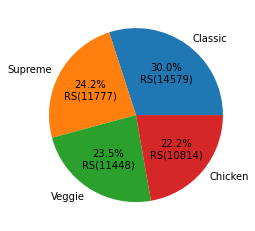

In [65]:
plt.pie(ordervalue,labels= category_name,autopct = lambda pct:func(pct,ordervalue))

Checking for the datatypes 

In [66]:
final_df.dtypes

pizza_id             object
pizza_type_id        object
size                 object
price               float64
name                 object
category             object
ingredients          object
order_id            float64
date                 object
time                 object
order_details_id    float64
quantity            float64
ordervalue          float64
dtype: object

# Changing datatype of date column

In [67]:
final_df['date']= pd.to_datetime(final_df['date'])

In [68]:
final_df.dtypes

pizza_id                    object
pizza_type_id               object
size                        object
price                      float64
name                        object
category                    object
ingredients                 object
order_id                   float64
date                datetime64[ns]
time                        object
order_details_id           float64
quantity                   float64
ordervalue                 float64
dtype: object

# Extracting Month name from date column

In [96]:
final_df['Month']=final_df['date'].dt.month_name()

In [97]:
final_df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,ordervalue,Month,DayName
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,12.75,January,Thursday
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,12.75,January,Friday
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,12.75,January,Friday
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,12.75,January,Saturday
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,12.75,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48620,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21230.0,2015-12-29,14:43:26,48341.0,1.0,20.25,December,Tuesday
48621,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21278.0,2015-12-31,11:22:31,48452.0,1.0,20.25,December,Thursday
48622,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21305.0,2015-12-31,16:31:16,48523.0,1.0,20.25,December,Thursday
48623,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21317.0,2015-12-31,18:01:42,48548.0,1.0,20.25,December,Thursday


# Extracting dayname and creating column of dayname 

In [98]:
final_df['DayName']=final_df['date'].dt.day_name()

In [99]:
final_df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,order_details_id,quantity,ordervalue,Month,DayName
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",6.0,2015-01-01,12:29:36,11.0,1.0,12.75,January,Thursday
1,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",102.0,2015-01-02,17:54:04,239.0,1.0,12.75,January,Friday
2,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",124.0,2015-01-02,20:12:34,294.0,1.0,12.75,January,Friday
3,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",194.0,2015-01-03,21:21:24,458.0,1.0,12.75,January,Saturday
4,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",208.0,2015-01-04,12:12:05,489.0,1.0,12.75,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48620,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21230.0,2015-12-29,14:43:26,48341.0,1.0,20.25,December,Tuesday
48621,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21278.0,2015-12-31,11:22:31,48452.0,1.0,20.25,December,Thursday
48622,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21305.0,2015-12-31,16:31:16,48523.0,1.0,20.25,December,Thursday
48623,veggie_veg_l,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",21317.0,2015-12-31,18:01:42,48548.0,1.0,20.25,December,Thursday


# Fetching values of dayname

In [100]:
day_name = final_df.DayName.value_counts().index

In [101]:
day_name

Index(['Friday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday',
       'Sunday'],
      dtype='object')

# Number of orders by Day

In [102]:
numoforders = final_df.DayName.value_counts().values

In [103]:
numoforders

array([8106, 7355, 7323, 6797, 6753, 6369, 5917], dtype=int64)

# Plotting a bar graph to visualize the frequency of orders as per day in week

From this visualization we find that the number of orders are greater on Fridays and surprisigly least on Sundays

<BarContainer object of 7 artists>

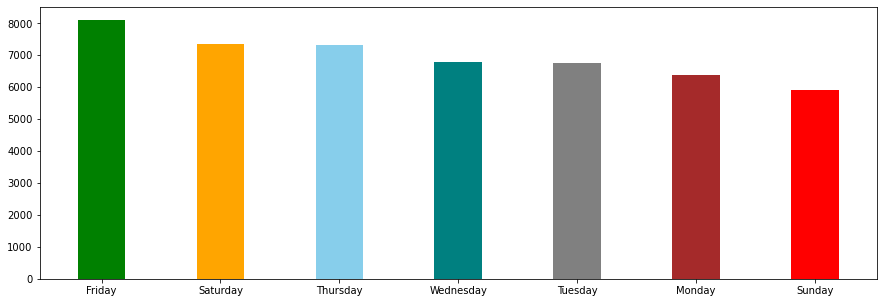

In [107]:
plt.figure(figsize=(15,5))
plt.bar(day_name, numoforders, color = ['Green', 'orange', 'skyblue', 'teal', 'grey','brown','red'],width = 0.4)


# Getting the month name 

In [108]:
month_name = final_df.Month.value_counts().index

In [109]:
month_name

Index(['July', 'May', 'March', 'November', 'January', 'August', 'April',
       'June', 'February', 'December', 'September', 'October'],
      dtype='object')

# Getting the number of orders as per the months

In [110]:
month_wise_orders = final_df.Month.value_counts().values

In [111]:
month_wise_orders

array([4301, 4239, 4186, 4185, 4156, 4094, 4067, 4025, 3892, 3859, 3819,
       3797], dtype=int64)

# Plotting the bar graph to visualize the number of orders as per month


From this visualization we Seen that number of orders are more in July month and less in October month

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(month_name, month_wise_orders,width= 0.4,color = ['Green'])

# saving final_df to local directory for visualization

In [126]:
final_df.to_csv('final_data.csv')